In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import torch
import numpy as np # linear algebra
import os
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm


/home/junhal11/miniconda3/envs/pgm/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [23]:
def plot_sample_examples(datax, datay, mean_y, sample_ys):
    image_num = len(sample_ys) + 3
    fig, ax = plt.subplots(nrows=1, ncols=image_num, figsize=(4 * image_num, 4))
    
    ax[0].imshow(np.transpose(datax, (1, 2, 0))[:, :, 0])
    ax[0].set_title("Orignal Image")
    ax[1].imshow(np.transpose(datay, (1, 2, 0))[:, :, 0])
    ax[1].set_title("Target Image")
    
    mean_y = np.argmax(mean_y, axis=0, keepdims=True)
    ax[2].imshow(np.transpose(mean_y, (1, 2, 0))[:, :, 0])
    ax[2].set_title("Mean Segmented Image")
    for i, sample_y in enumerate(sample_ys, 1):
        sample_y = np.argmax(sample_y, axis=0, keepdims=True)
        ax[i + 2].imshow(np.transpose(sample_y, (1, 2, 0))[:, :, 0])
        ax[i + 2].set_title(f"Sampling Segmented Image {i}")
    return fig, ax

In [9]:
test_samplings = torch.load(
    '../output/segmentation/prob_unet/sample-2023-05-27-15-35-00/test_samplings.pth',
    map_location=torch.device('cpu')
)

In [8]:
test_samplings['x'][0].shape

torch.Size([28, 1, 284, 284])

(<Figure size 3200x400 with 8 Axes>,
 array([<Axes: title={'center': 'Orignal Image'}>,
        <Axes: title={'center': 'Target Image'}>,
        <Axes: title={'center': 'Mean Segmented Image'}>,
        <Axes: title={'center': 'Sampling Segmented Image 1'}>,
        <Axes: title={'center': 'Sampling Segmented Image 2'}>,
        <Axes: title={'center': 'Sampling Segmented Image 3'}>,
        <Axes: title={'center': 'Sampling Segmented Image 4'}>,
        <Axes: title={'center': 'Sampling Segmented Image 5'}>],
       dtype=object))

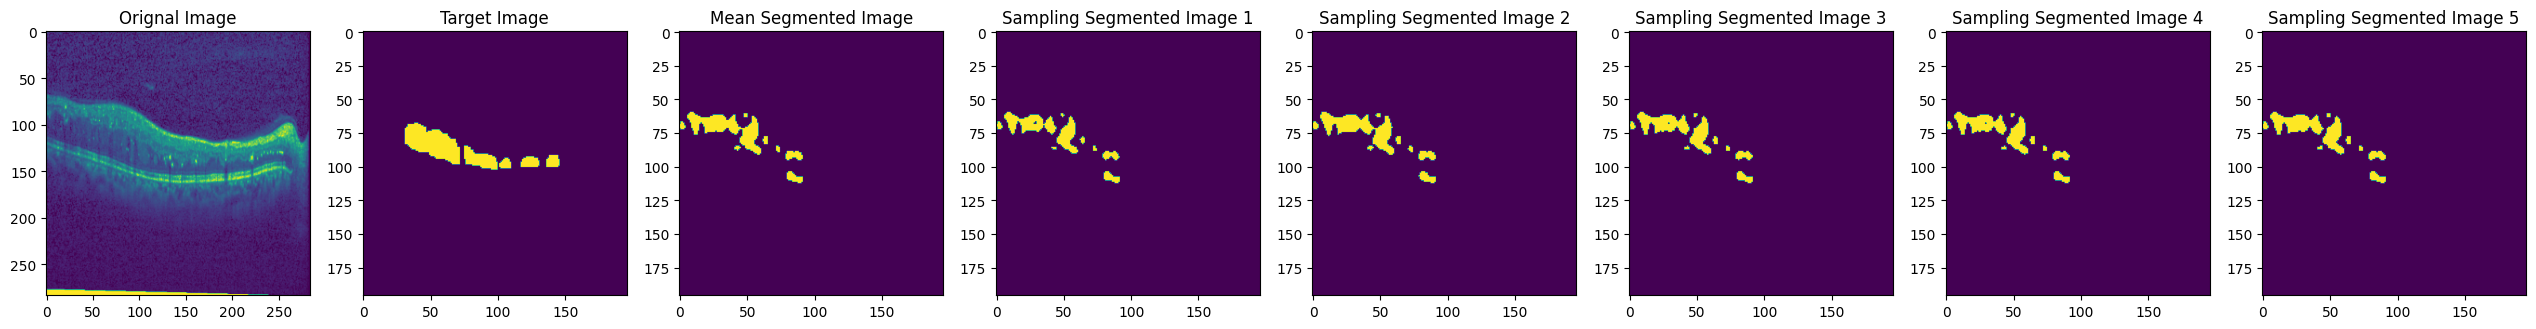

In [27]:
index = 5

plot_sample_examples(
    test_samplings['x'][index].squeeze(0).numpy(),
    test_samplings['y_true'][index].squeeze(0).numpy(),
    test_samplings['y_pred'][index]['mean_pred'].squeeze(0).numpy(),
    [i.squeeze(0).numpy() for i in test_samplings['y_pred'][index]['sampling_pred']]
)